In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons,load_iris
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,mean_squared_error
from sklearn import ensemble

# Voting -- Use of Diverse Set of Classifiers

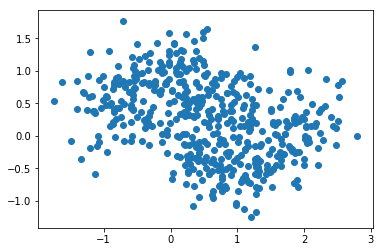

In [2]:
X, y = make_moons(n_samples = 500,noise = 0.3,random_state = 42) # why setting n_samp to 500 and include noise?
plt.scatter(X[:,0],X[:,1])

Hard Voting

In [3]:
# Train and evaluate Voting Classifier with Hard and Soft Voting on Moon Dataset
X_train, X_test, y_train, y_test = train_test_split(X,y)
svm = SVC(random_state=42)
lr = LogisticRegression(random_state=42)
rf = ensemble.RandomForestClassifier(random_state=42)
voting_clf = ensemble.VotingClassifier(estimators = [('svm',svm),('lr',lr),('rf',rf)],voting = 'hard')
voting_clf.fit(X_train,y_train)

# The performance of each of the individual models on the data
for clf in (svm,lr,rf,voting_clf):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    print (clf.__class__.__name__,'=',accuracy_score(y_test,y_pred))

SVC = 0.888
LogisticRegression = 0.872
RandomForestClassifier = 0.856
VotingClassifier = 0.88


C:\Users\afamili001\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\afamili001\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\afamili001\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\afamili001\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'sc

Soft Voting -- [Performing slightly better than hard voting], giving more weight to highest number of votes (as opposed to counting them)
    - Predicting class label based on the sums of the predicted probabilities

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X,y)
svm = SVC(probability=True,random_state=42)
lr = LogisticRegression(random_state=42)
rf = ensemble.RandomForestClassifier(random_state=42)
voting_clf = ensemble.VotingClassifier(estimators = [('svm',svm),('lr',lr),('rf',rf)],voting = 'soft')
voting_clf.fit(X_train,y_train)

# The performance of each of the individual models on the data
for clf in (svm,lr,rf,voting_clf):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    print (clf.__class__.__name__,'=',accuracy_score(y_test,y_pred))

C:\Users\afamili001\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\afamili001\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\afamili001\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\afamili001\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'sc

SVC = 0.904
LogisticRegression = 0.872
RandomForestClassifier = 0.912
VotingClassifier = 0.936


C:\Users\afamili001\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\afamili001\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# Bagging

In [5]:
bag_clf = ensemble.BaggingClassifier(DecisionTreeClassifier(),
                                     n_estimators=500,max_samples=100,
                                     bootstrap=True)
bag_clf.fit(X_train,y_train)
y_pred = bag_clf.predict(X_test)
# bag_clf_sc = bag_clf.score(X_test,y_test)
bag_clf_sc1 = accuracy_score(y_pred,y_test)
print ('Bagging Classifier Accuracy = %.3f'%(bag_clf_sc1))

Bagging Classifier Accuracy = 0.936


In [6]:
# Bagging Classifier with OOB Samples
oob_bag_clf = ensemble.BaggingClassifier(n_estimators=500,
                                        oob_score = True) # Default est = DecisionTreeClassifier
oob_bag_clf.fit(X_train,y_train)
oob_sc = oob_bag_clf.oob_score_
print ('Bagging Classifier Training Accuracy (on oob objects)= %.3f'%(oob_sc))

oob_bag_y_pred = oob_bag_clf.predict(X_test)
oob_test_acc = accuracy_score(y_test,oob_bag_y_pred)
print ('Bagging Clf ACC = %.3f'%(oob_test_acc)) # acc = 0.936 ?

Bagging Classifier Training Accuracy (on oob objects)= 0.899
Bagging Clf ACC = 0.936


In [12]:
# Decision function's prob on each training instance
# oob_bag_clf.predict_proba(X_train)

Random Forest

In [8]:
rf_clf = ensemble.RandomForestClassifier(n_estimators=500,max_leaf_nodes=16,n_jobs=-1)
rf_clf.fit(X_train,y_train)
y_pred_rf = rf_clf.predict(X_test)
sc_rf = accuracy_score(y_test,y_pred_rf)
print ('RF Acc = %.3f'%(sc_rf))

RF Acc = 0.936


Feature Importances

In [9]:
iris = load_iris()
dt = DecisionTreeClassifier(max_leaf_nodes=16)
dt.fit(iris['data'],iris['target'])
feat_imp_dt = dt.feature_importances_
for name,score in zip(iris['feature_names'],feat_imp_dt):
    print (name,score)

sepal length (cm) 0.0
sepal width (cm) 0.013333333333333329
petal length (cm) 0.5640559581320451
petal width (cm) 0.4226107085346215


In [10]:
iris = load_iris()
rf = ensemble.RandomForestClassifier(n_estimators=500,n_jobs=-1)
rf.fit(iris['data'],iris['target'])
feat_imp_rf = rf.feature_importances_
for name,score in zip(iris['feature_names'],feat_imp_rf):
    print (name,score)

sepal length (cm) 0.10827259539338972
sepal width (cm) 0.02274456570466992
petal length (cm) 0.41302211037237596
petal width (cm) 0.4559607285295644


# Boosting

AdaBoost

In [19]:
# Adaboost - default estimator = Decision Stump [tree with max_depth = 1]
ab = ensemble.AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),
                                 n_estimators=200,algorithm='SAMME.R',
                                 learning_rate=0.5) 
ab.fit(X_train,y_train)
y_pred_ab = ab.predict(X_test)
score_ab = accuracy_score(y_pred_ab,y_test)
print ('Adaboost Acc = %.3f'%(score_ab))

Adaboost Acc = 0.896


Gradient Boosting Estimator Overfitting/Underfitting the data

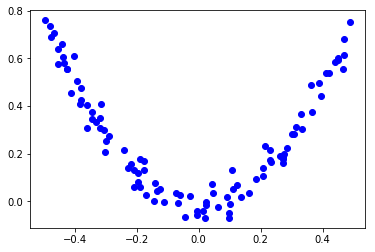

In [33]:
np.random.seed(42)
X1 = np.random.rand(100, 1) - 0.5
y1 = 3*X[:, 0]**2 + 0.05 * np.random.randn(100)
plt.plot(X1,y1, 'bo')

In [46]:
gbrt_overfit = ensemble.GradientBoostingRegressor(max_depth=2,n_estimators=200,learning_rate=0.1,random_state=42)
gbrt_overfit.fit(X1,y1)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=2, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=200, n_iter_no_change=None, presort='auto',
             random_state=42, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [47]:
gbrt_underfit = ensemble.GradientBoostingRegressor(max_depth=2,n_estimators=3,learning_rate=0.1,random_state=42)
gbrt_underfit.fit(X1,y1)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=2, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=3, n_iter_no_change=None, presort='auto',
             random_state=42, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [48]:
def plot_predictions(regressors, X, y, axes, label=None, style="r-", data_style="b.", data_label=None):
    x1 = np.linspace(axes[0], axes[1], 500)
    y_pred = sum(regressor.predict(x1.reshape(-1, 1)) for regressor in regressors)
    plt.plot(X[:, 0], y, data_style, label=data_label)
    plt.plot(x1, y_pred, style, linewidth=2, label=label)
    if label or data_label:
        plt.legend(loc="upper center", fontsize=16)
    plt.axis(axes)

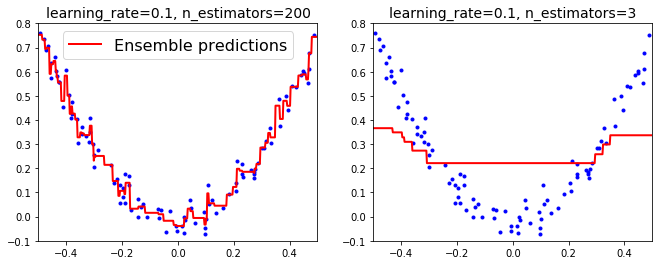

In [49]:

plt.figure(figsize=(11,4))

plt.subplot(121)
plot_predictions([gbrt_overfit], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="Ensemble predictions")
plt.title("learning_rate={}, n_estimators={}".format(gbrt_overfit.learning_rate, gbrt_overfit.n_estimators), fontsize=14)

plt.subplot(122)
plot_predictions([gbrt_underfit], X, y, axes=[-0.5, 0.5, -0.1, 0.8])
plt.title("learning_rate={}, n_estimators={}".format(gbrt_underfit.learning_rate, gbrt_underfit.n_estimators), fontsize=14)

plt.show()

Optimal Gradient Boosting Algorithm -- Early Stopping

In [61]:

X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=49)

gb = ensemble.GradientBoostingRegressor(max_depth=2, n_estimators=120, random_state=42)
gb.fit(X_train, y_train)

errors = [mean_squared_error(y_val, y_pred)
          for y_pred in gb.staged_predict(X_val)] # Compute error at each stage of training
bst_n_estimators = np.argmin(errors) + 1

gb_best = ensemble.GradientBoostingRegressor(max_depth=2,n_estimators=bst_n_estimators, random_state=42)
gb_best.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=2, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=56, n_iter_no_change=None, presort='auto',
             random_state=42, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

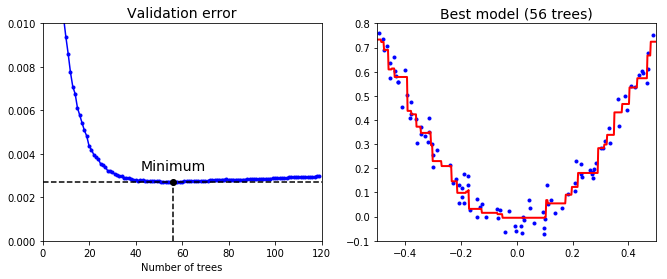

In [62]:
min_error = np.min(errors)
plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.plot(errors, "b.-")
plt.plot([bst_n_estimators, bst_n_estimators], [0, min_error], "k--")
plt.plot([0, 120], [min_error, min_error], "k--")
plt.plot(bst_n_estimators, min_error, "ko")
plt.text(bst_n_estimators, min_error*1.2, "Minimum", ha="center", fontsize=14)
plt.axis([0, 120, 0, 0.01])
plt.xlabel("Number of trees")
plt.title("Validation error", fontsize=14)

plt.subplot(122)
plot_predictions([gb_best], X, y, axes=[-0.5, 0.5, -0.1, 0.8])
plt.title("Best model (%d trees)" % bst_n_estimators, fontsize=14)

plt.show()

In [64]:
# Stopping training if the error didn't change after 5 consecutive iterations
gb = ensemble.GradientBoostingRegressor(max_depth=2, warm_start=True, random_state=42)
min_val_error = float("inf")
error_going_up = 0
for n_estimators in range(1, 120):
    gb.n_estimators = n_estimators
    gb.fit(X_train, y_train)
    y_pred = gb.predict(X_val)
    val_error = mean_squared_error(y_val, y_pred)
    if val_error < min_val_error:
        min_val_error = val_error
        error_going_up = 0
    else:
        error_going_up += 1 # Incremental Training; stopping training once the min val err is hit
        if error_going_up == 5:
            break 

Summary:

    ****** "Wisdom of Crowd" ******
    Ensemble Learning: Aggregating predictions from each classifier
    Voting Classifier: Selecting the class label with the highest number of votes from each individual classifier
    Bagging: Training ensemble of classifiers on subsets of training instances in parallel - Ex: Random Forest
        Random Forest: ensemble of Decision Trees
        Extra Tree Classifier -- Trees that use random thresholds for each features (at each node)
        Feature Importance -- 
            - Decision Tree: imp features showing up at the top of the tree/ close to the root
            - Random Forest: Average depth of the tree at which the feature appears across all trees in the forest
    Boosting: Training a combination of weak classifiers, being trained sequentially - Ex: Adaboost, Gradient Boosting
            - AdaBoost -- tweaks instance weights at each iteration
            - Gradient Boosting
                - Stochastic Gradient Descent
                - Shrinkage = setting a low learning rate value to train more trees
                - Early Stopping = used to decide on the number of trees used in training
                    - Warm Start (HyperParameter) -- stop training once the min err is achieved
    Stacking
        
    Predictor Aggregation reduces both bias and variance 
    More predictor diversity ==> less variance
    